In [2]:
pip install mediapipe --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_styled_landmarks(frame, results)

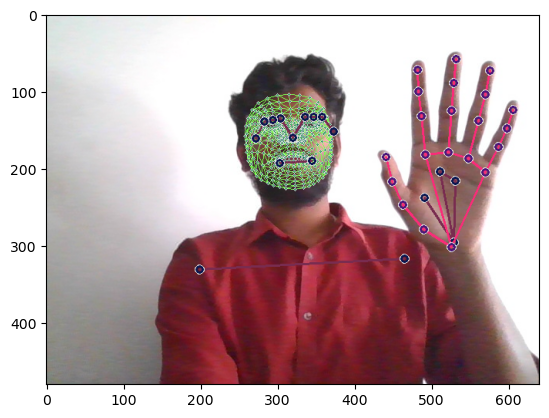

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
results.pose_landmarks.landmark

[x: 0.500728189945221
y: 0.33539536595344543
z: -0.6504814028739929
visibility: 0.999973714351654
, x: 0.5258524417877197
y: 0.2777493894100189
z: -0.5905681848526001
visibility: 0.9999436736106873
, x: 0.5436084270477295
y: 0.27782005071640015
z: -0.5902349948883057
visibility: 0.9999536871910095
, x: 0.5595870018005371
y: 0.2786712944507599
z: -0.5895684361457825
visibility: 0.9999467134475708
, x: 0.475168377161026
y: 0.2823079824447632
z: -0.5810993909835815
visibility: 0.9999233484268188
, x: 0.4595469534397125
y: 0.2855839431285858
z: -0.580165684223175
visibility: 0.9999176859855652
, x: 0.44334515929222107
y: 0.29146915674209595
z: -0.580534815788269
visibility: 0.9998957514762878
, x: 0.5828885436058044
y: 0.3176434636116028
z: -0.2535251975059509
visibility: 0.9999508261680603
, x: 0.42546430230140686
y: 0.3373400866985321
z: -0.20483465492725372
visibility: 0.9999244213104248
, x: 0.5392966866493225
y: 0.3968987464904785
z: -0.5336970090866089
visibility: 0.9999656081199646


In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
result_test = extract_keypoints(results)
result_test


array([ 0.50072819,  0.33539537, -0.6504814 , ...,  0.        ,
        0.        ,  0.        ])

In [12]:
result_test = extract_keypoints(results)
result_test


array([ 0.50072819,  0.33539537, -0.6504814 , ...,  0.        ,
        0.        ,  0.        ])

In [13]:
result_test.shape

(1662,)

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 0.50072819,  0.33539537, -0.6504814 , ...,  0.        ,
        0.        ,  0.        ])

In [16]:
import os

# Path for exported data, numpy arrays
DATA_PATH = 'MP_Data'

# Check if MP_Data folder exists, if not, create it
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','Walk','Eat','Drink-water','Cook','Write','Read','Talk'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()
cap.release()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [81]:
actions = np.array(['hello', 'thanks', 'iloveyou','Walk','Eat','Drink-water','Cook','Write','Read','Talk'])

In [82]:
label_map = {label:num for num, label in enumerate(actions)}

In [83]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'Walk': 3,
 'Eat': 4,
 'Drink-water': 5,
 'Cook': 6,
 'Write': 7,
 'Read': 8,
 'Talk': 9}

In [84]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [85]:
np.array(sequences).shape

(300, 30, 1662)

In [86]:
np.array(labels).shape

(300,)

In [87]:
np.array(res).shape

(1662,)

In [88]:
X = np.array(sequences)

In [89]:
X.shape

(300, 30, 1662)

In [90]:
y = to_categorical(labels).astype(int)


In [91]:
y.shape

(300, 10)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [93]:
y_test.shape

(30, 10)

In [94]:
X_test.shape

(30, 30, 1662)

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [192]:
# log_dir = os.path.join('Logs')
# tb_callback = TensorBoard(log_dir=log_dir)

In [193]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [194]:
actions.shape[0]

10

In [195]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [196]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
9/9 [==============================] - 5s 43ms/step - loss: 2.5294 - categorical_accuracy: 0.1296
Epoch 2/150
9/9 [==============================] - 0s 52ms/step - loss: 2.3618 - categorical_accuracy: 0.1111
Epoch 3/150
9/9 [==============================] - 0s 47ms/step - loss: 2.3022 - categorical_accuracy: 0.1444
Epoch 4/150
9/9 [==============================] - 0s 41ms/step - loss: 2.2965 - categorical_accuracy: 0.1333
Epoch 5/150
9/9 [==============================] - 0s 45ms/step - loss: 2.2871 - categorical_accuracy: 0.1593
Epoch 6/150
9/9 [==============================] - 0s 46ms/step - loss: 2.2571 - categorical_accuracy: 0.1481
Epoch 7/150
9/9 [==============================] - 0s 44ms/step - loss: 2.3264 - categorical_accuracy: 0.1556
Epoch 8/150
9/9 [==============================] - 0s 46ms/step - loss: 2.3034 - categorical_accuracy: 0.1444
Epoch 9/150
9/9 [==============================] - 0s 47ms/step - loss: 2.2628 - categorical_accuracy: 0.1889
Epoch 10/1

9/9 [==============================] - 0s 42ms/step - loss: 0.5103 - categorical_accuracy: 0.8148
Epoch 75/150
9/9 [==============================] - 0s 41ms/step - loss: 0.5444 - categorical_accuracy: 0.7852
Epoch 76/150
9/9 [==============================] - 0s 39ms/step - loss: 0.4537 - categorical_accuracy: 0.8444
Epoch 77/150
9/9 [==============================] - 0s 49ms/step - loss: 0.4449 - categorical_accuracy: 0.8556
Epoch 78/150
9/9 [==============================] - 0s 48ms/step - loss: 0.3541 - categorical_accuracy: 0.8704
Epoch 79/150
9/9 [==============================] - 0s 45ms/step - loss: 0.4224 - categorical_accuracy: 0.8407
Epoch 80/150
9/9 [==============================] - 0s 43ms/step - loss: 0.4159 - categorical_accuracy: 0.8519
Epoch 81/150
9/9 [==============================] - 0s 52ms/step - loss: 0.3858 - categorical_accuracy: 0.8741
Epoch 82/150
9/9 [==============================] - 0s 47ms/step - loss: 0.2873 - categorical_accuracy: 0.9037
Epoch 83/150
9

9/9 [==============================] - 0s 38ms/step - loss: 1.4506 - categorical_accuracy: 0.7519
Epoch 148/150
9/9 [==============================] - 0s 48ms/step - loss: 1.0904 - categorical_accuracy: 0.6667
Epoch 149/150
9/9 [==============================] - 0s 53ms/step - loss: 0.4977 - categorical_accuracy: 0.8370
Epoch 150/150
9/9 [==============================] - 0s 38ms/step - loss: 0.4094 - categorical_accuracy: 0.8704


In [197]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30, 32)            216960    
                                                                 
 lstm_31 (LSTM)              (None, 30, 64)            24832     
                                                                 
 lstm_32 (LSTM)              (None, 128)               98816     
                                                                 
 dense_30 (Dense)            (None, 32)                4128      
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 347498 (1.33 MB)
Trainable params: 3474

In [198]:
res = model.predict(X_test)

1/1 [==============================] - 1s 513ms/step


In [202]:
actions[np.argmax(res[5])]

'hello'

In [203]:
actions[np.argmax(y_test[5])]

'hello'

In [204]:
model.save('action.h5')

C:\Users\virupaksha\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [205]:
# del model

In [206]:
model.load_weights('action.h5')

In [207]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [208]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [209]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 48ms/step


In [210]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [211]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[28,  0],
        [ 0,  2]],

       [[27,  0],
        [ 0,  3]],

       [[26,  0],
        [ 2,  2]],

       [[26,  1],
        [ 0,  3]],

       [[27,  0],
        [ 2,  1]],

       [[28,  2],
        [ 0,  0]],

       [[25,  0],
        [ 1,  4]],

       [[26,  1],
        [ 0,  3]],

       [[26,  0],
        [ 1,  3]],

       [[25,  2],
        [ 0,  3]]], dtype=int64)

In [212]:
accuracy_score(ytrue, yhat)

0.8

In [216]:
colors = [(245,117,16), (117,245,16), (16,117,245),
          # Add additional colors here
          (0, 255, 255),  # Blue
          (255, 0, 255),  # Pink
          (255, 255, 0),  # Yellow
          (0, 0, 255),  # Dark blue
          (128, 0, 128),  # Purple
          (255, 128, 0),  # Orange
          (0, 128, 128)   # Teal
         ]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

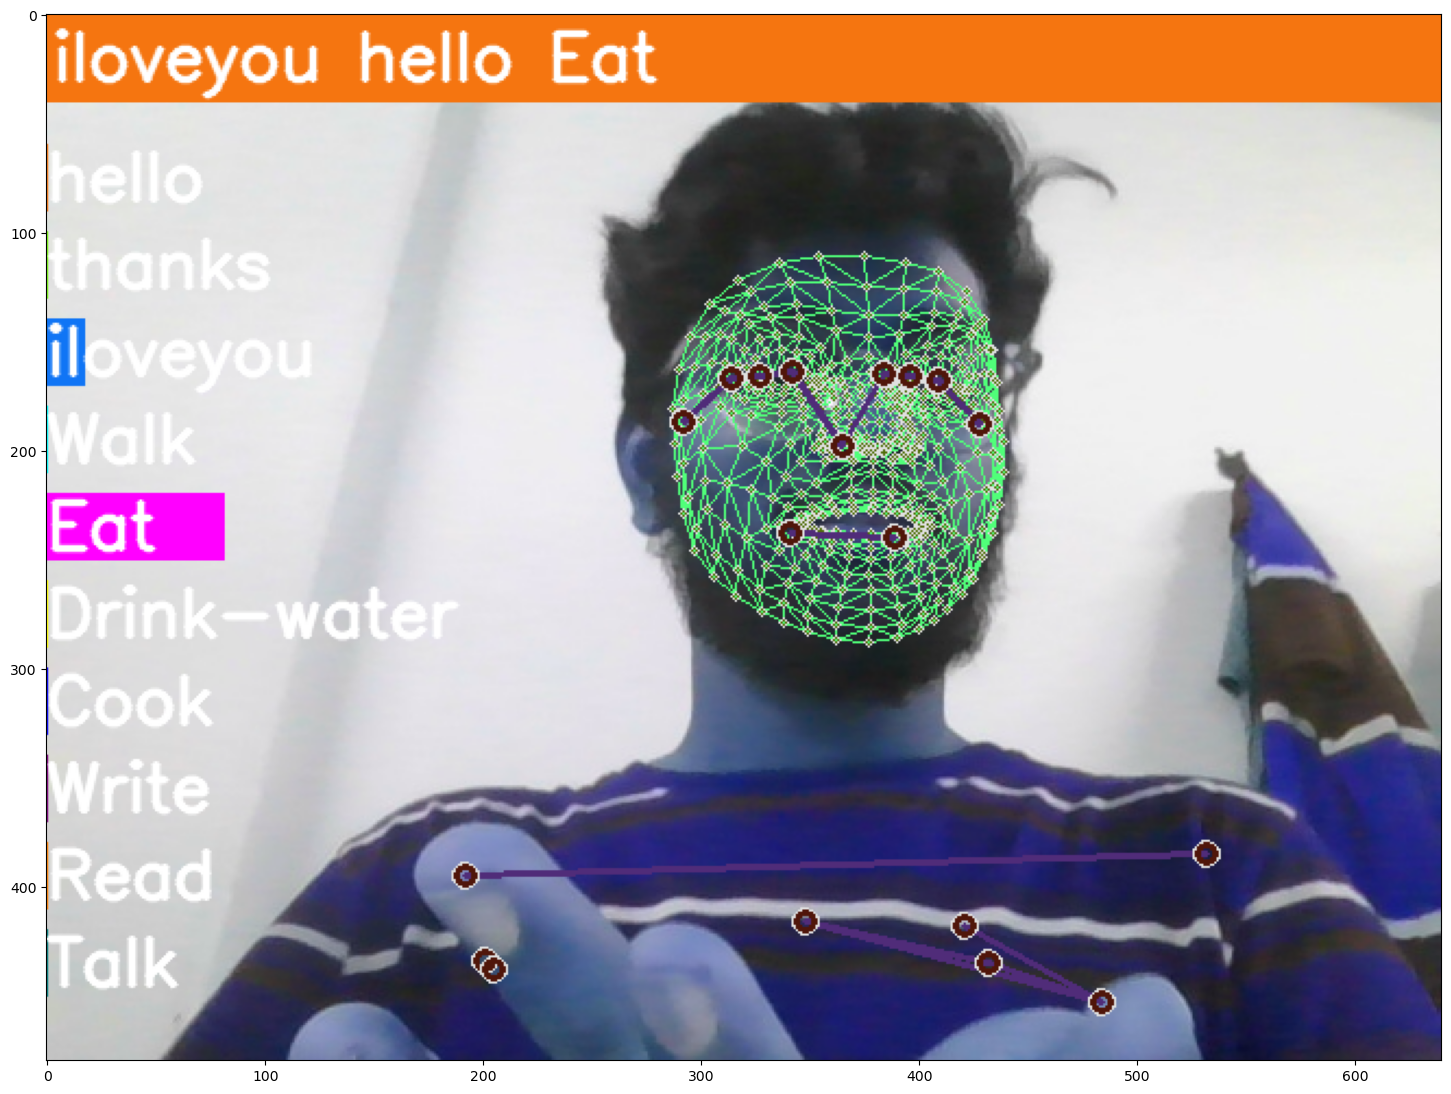

In [217]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [215]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 27ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Eat
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
Eat
<class 'mediapipe.python.solution_base.S

In [70]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold